# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Muhammad Fauzan Hernadi
- Email: hernadifauzan@gmail.com
- Id Dicoding: fauzanhr

## Menentukan Pertanyaan Bisnis

- pertanyaan 1: bagaimana hubungan antara suhu (temp) terhadap jumlah sewa sepeda harian?
- pertanyaan 2: Di musim kapan terjadi peningkatan di titik tertinggi dan penurunan di titik terendah jumlah total sewa sepeda?

- pertanyaan 3: Bagaimana perbandingan total jumlah sewa sepeda pada hari kerja dengan sewa sepeda pada hari libur?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Tahap pertama kita akan melakukan pengumpulan data pada setiap data frame kemudian kita akan menggabungnya

In [2]:
day = pd.read_csv("Data/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour = pd.read_csv("Data/hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### menggabungkan dataframe day dan hour untuk mengambil nilai yang sama

In [4]:
bikeSharing = pd.merge(left=day, right=hour, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
bikeSharing.loc[bikeSharing["dteday"].isnull()]
bikeSharing.head()

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

##### Memeriksa data yang telah dikumpulkan di tahap sebelumnya untuk memeriksa apakah ada missing values, invalid value,dan data yang terduplikasi

In [5]:
day.info()
hour.info()
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

##### tidak terdapat missing values di ketiga dataframe, berikutnya kita akan mencari data yang terduplikasi dan hasilnya nol

In [6]:
print("Jumlah duplikasi day: ", day.duplicated().sum())
print("Jumlah duplikasi hour: ", hour.duplicated().sum())
print("Jumlah duplikasi bikesharing: ", bikeSharing.duplicated().sum())

Jumlah duplikasi day:  0
Jumlah duplikasi hour:  0
Jumlah duplikasi bikesharing:  0


In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
bikeSharing.describe()

,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
bikeSharing['temp_daily'] *= 39
bikeSharing.head()

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,13.422513,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,13.422513,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,13.422513,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,13.422513,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,13.422513,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

##### Berikutnya kita akan melakukan eksplorasi data untuk menjawab ketiga pertanyaan di atas 
- pertama kita akan melihat rangkuman parameter statistik

In [11]:
bikeSharing.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,19.382500,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,7.115366,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.306086,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.260000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,19.597500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,25.577487,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


##### Mencari hubungan antara suhu dengan jumlah sewa sepeda di hari kerja setiap jam dan harian serta total jumlah rental sepeda

In [12]:
bikeSharing.groupby(by=["temp_hourly", "atemp_hourly"]).agg({
    "workingday_hourly": "count", 
    "hum_hourly":["max", "min", "mean"]
}).sort_values(by=("workingday_hourly", "count"), ascending=False)

workingday_hourly hum_hourly                
                                     count        max   min      mean
temp_hourly atemp_hourly                                             
0.40        0.4091                     614       1.00  0.00  0.647003
0.56        0.5303                     579       1.00  0.19  0.667910
0.54        0.5152                     569       1.00  0.10  0.679895
0.46        0.4545                     559       1.00  0.14  0.677317
0.52        0.5000                     556       1.00  0.08  0.666871
...                                    ...        ...   ...       ...
0.82        0.8485                       1       0.67  0.67  0.670000
            0.8939                       1       0.75  0.75  0.750000
0.84        0.8485                       1       0.63  0.63  0.630000
            0.8939                       1       0.71  0.71  0.710000
1.00        0.8636                       1       0.19  0.19  0.190000

[294 rows x 4 columns]

In [13]:
bikeSharing.groupby(by=["temp_daily", "atemp_daily"]).agg({
    "workingday_daily": "count", 
    "hum_daily":["max", "min", "mean"]
}).sort_values(by=("workingday_daily", "count"), ascending=False)

workingday_daily hum_daily                    
                                  count       max       min      mean
temp_daily atemp_daily                                               
14.430000  0.375621                  48  0.692500  0.580833  0.636667
20.767500  0.522721                  48  0.701667  0.489167  0.595417
19.434987  0.493046                  24  0.612500  0.612500  0.612500
23.887500  0.585238                  24  0.576250  0.576250  0.576250
23.660013  0.573875                  24  0.507917  0.507917  0.507917
...                                 ...       ...       ...       ...
8.482500   0.203600                  16  0.862500  0.862500  0.862500
8.450013   0.232333                  12  0.861667  0.861667  0.861667
12.409098  0.309909                  11  0.825455  0.825455  0.825455
7.605000   0.219700                   8  0.687500  0.687500  0.687500
17.160000  0.439400                   1  0.880000  0.880000  0.880000

[729 rows x 4 columns]

In [14]:
bikeSharing.groupby(by=["temp_hourly", "atemp_hourly"]).cnt_hourly.nunique().sort_values(ascending=False)

temp_hourly  atemp_hourly
0.56         0.5303          343
0.52         0.5000          333
0.54         0.5152          326
0.40         0.4091          308
0.42         0.4242          302
                            ... 
0.82         0.8485            1
             0.8939            1
0.84         0.8485            1
             0.8939            1
1.00         0.8636            1
Name: cnt_hourly, Length: 294, dtype: int64

In [15]:
bikeSharing.groupby(by=["temp_daily", "atemp_daily"]).cnt_daily.nunique().sort_values(ascending=False)

temp_daily  atemp_daily
14.430000   0.375621       2
20.767500   0.522721       2
2.306086    0.079070       1
23.887500   0.585238       1
23.660013   0.573875       1
                          ..
15.047487   0.396454       1
15.174549   0.385668       1
15.177513   0.393937       1
15.210000   0.381317       1
33.605013   0.804913       1
Name: cnt_daily, Length: 729, dtype: int64

##### Mencari nilai jumlah rental sepeda pada hari kerja, harian, bulanan berdasarkan musim 

In [16]:
bikeSharing.groupby(by=["season_daily"]).mnth_daily .nunique()

season_daily
1    4
2    4
3    4
4    4
Name: mnth_daily, dtype: int64

In [17]:
bikeSharing.groupby(by="season_daily").agg({
    "workingday_daily": "count", 
    "windspeed_daily": ["max", "min", "mean"]
}).sort_values(by=("workingday_daily", "count"), ascending=False)

workingday_daily windspeed_daily                    
                        count             max       min      mean
season_daily                                                     
3                        4496        0.375617  0.064071  0.171593
2                        4409        0.388067  0.065929  0.203410
1                        4242        0.507463  0.045408  0.215107
4                        4232        0.422275  0.022392  0.170819

In [18]:
bikeSharing.groupby(by="season_daily").cnt_daily.nunique().sort_values(ascending = False)

season_daily
3    188
2    182
1    179
4    176
Name: cnt_daily, dtype: int64

##### Mencari jumlah rental sepeda pada hari kerja

In [19]:
bikeSharing.groupby(by="workingday_daily").cnt_daily.nunique().sort_values(ascending = False)

workingday_daily
1    487
0    223
Name: cnt_daily, dtype: int64

In [20]:
bikeSharing.groupby(by="workingday_hourly").cnt_hourly.nunique().sort_values(ascending = False)

workingday_hourly
1    856
0    676
Name: cnt_hourly, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

### bagaimana hubungan antara suhu (temp) terhadap jumlah sewa sepeda harian?

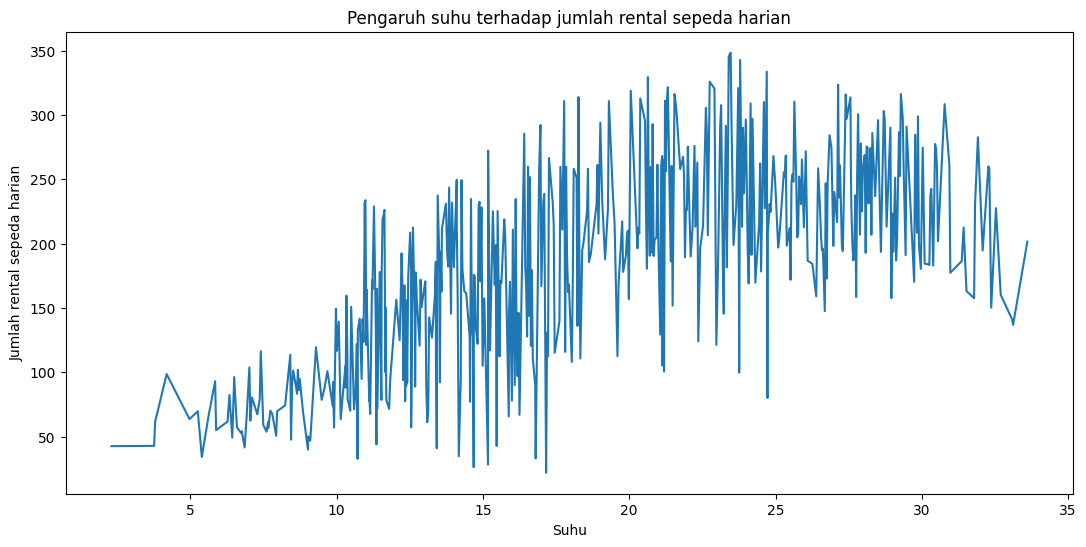

In [21]:
plt.figure(figsize=(13, 6))
sns.lineplot(x='temp_daily', y='cnt_hourly', data=bikeSharing, errorbar = None)
plt.title("Pengaruh suhu terhadap jumlah rental sepeda harian")
plt.xlabel("Suhu")
plt.ylabel("Jumlah rental sepeda harian")
plt.show()

- meningkatnya jumlah sewa sepeda harian berbanding lurus dengan suhu yang meningkat
- Jumlah rental sepeda mencapai puncak di rentang 20-25 derajat celcius

### Pertanyaan 2: 

 ### Di musim kapan terjadi peningkatan di titik tertinggi dan penurunan di titik terendah jumlah total sewa sepeda?

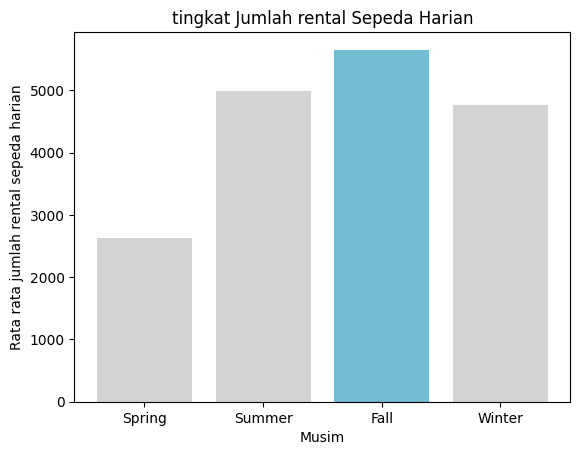

In [22]:
season_data = bikeSharing.groupby('season_daily')['cnt_daily'].mean()
season_name = ['Spring', 'Summer', 'Fall', 'Winter']
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4","#D3D3D3"]
plt.bar(season_name, season_data, color= colors)
plt.xlabel('Musim')
plt.ylabel('Rata rata jumlah rental sepeda harian')
plt.title('tingkat Jumlah rental Sepeda Harian')
plt.show()


- dapat dilihat bahwa pada musim gugur (fall) jumlah rental sepeda harian mencapai titik tertinggi dan di musim semi (spring) jumlah rental sepeda mencapai titik terendah

### Pertanyaan 3:

### Bagaimana perbandingan total jumlah sewa sepeda pada hari kerja dengan sewa sepeda pada hari libur

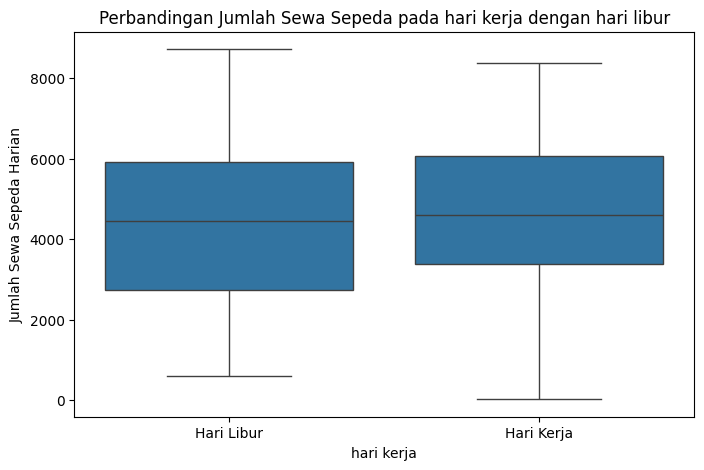

In [23]:
plt.figure(figsize=(8, 5))
bikeSharing['workingday_daily'] = bikeSharing['workingday_daily'].replace({0: 'Hari Libur', 1: 'Hari Kerja'})
sns.boxplot(x="workingday_daily", y="cnt_daily", data=bikeSharing)
plt.title("Perbandingan Jumlah Sewa Sepeda pada hari kerja dengan hari libur")
plt.xlabel("hari kerja")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

## Conclusion

- Conclution pertanyaan 1: meningkatnya jumlah rental sepeda harian berbanding lurus dengan suhu yang meningkat dan mencapai puncak tertinggi di rentang 20-25 derajat celcius

- Conclution pertanyaan 2: Jumlah rental sepeda harian mencapai puncak tertinggi dan terendah di musim gugur dan musim semi berdasarkan gambar di no 2

- Conclusion pertanyaan 3: orang-orang sering meminjam sepeda pada hari kerja dibandingkan di hari libur

In [24]:
bikeSharing.to_csv("bikeSharing.csv", index=False)